<a href="https://colab.research.google.com/github/DhanuMW/Data_Science_Projects/blob/main/AIDI_1003_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project 3 - German Credit Dataset

The German credit dataset contains data in which each enty represents a person who took a credit by a bank. Each person is classified as good or bad credit risk according to the given attributes. Some attributes are removed from the dataset because of them being not important or else the description being obsecured.

In [ ]:
# import required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount google drive to upload the dataset
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


As the initial step, the german_credit_data file is loaded to the notebook and analyzed the entries.

In [ ]:
# load the dataset
credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/german_credit_data.csv')
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Then checked for null values in the dataset.

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
credit.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

There were 183 null values in the "Savings accounts" column and 394 null values in the "Checking accounts" column. The dataset will be analyzed further whether to keep the entries or remove.

In [ ]:
print('Number of unique values:\n{}'.format(credit.nunique()))

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


According to the above table, it is clearly visible that except age, credit amount, and duration, all other columns are categorical data in the given dataset.

In [ ]:
print('Unique values in each categorical column:')
for col in credit.select_dtypes(include=[object]):
  print(col, ':', credit[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk : ['good' 'bad']


The categories of each categorical column are clearly defined in the above result.

After all analysis, it can be decided that the null values in savings accounts and checking accounts columns could be meaning that the given account balances are zero. Since the entries are not mistakes or errors, it is decided to keep the null values in the dataset.

In [ ]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


The categorical variables are encoded using the one hot encoding method of pandas library.

In [ ]:
categorical_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
credit = pd.get_dummies(credit, columns=categorical_features)

Then the Risk column is dropped from the dataset because it is the target variable.

In [ ]:
credit_coded = credit.drop(['Risk'], axis=1)
credit_coded.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
credit_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_female                   1000 non-null   uint8
 5   Sex_male                     1000 non-null   uint8
 6   Housing_free                 1000 non-null   uint8
 7   Housing_own                  1000 non-null   uint8
 8   Housing_rent                 1000 non-null   uint8
 9   Saving accounts_little       1000 non-null   uint8
 10  Saving accounts_moderate     1000 non-null   uint8
 11  Saving accounts_quite rich   1000 non-null   uint8
 12  Saving accounts_rich         1000 non-null   uint8
 13  Checking account_little      1000 non-null   uint

Then the numerical features are visualized using histograms. The identified numerical columns are age, credit amount, and duration.

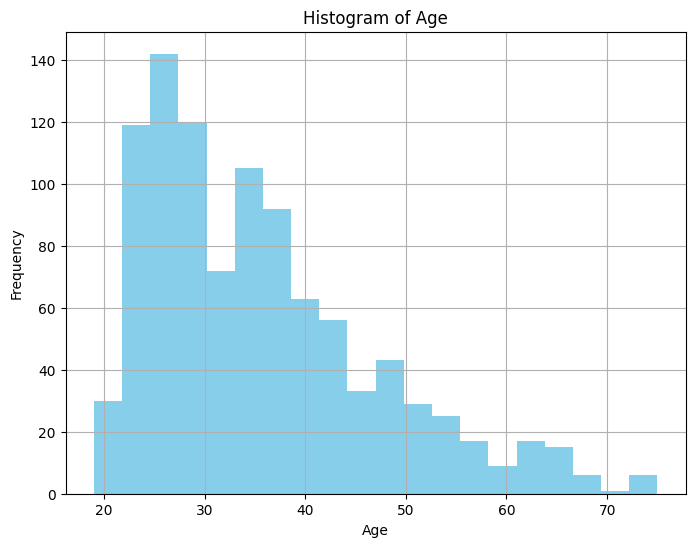

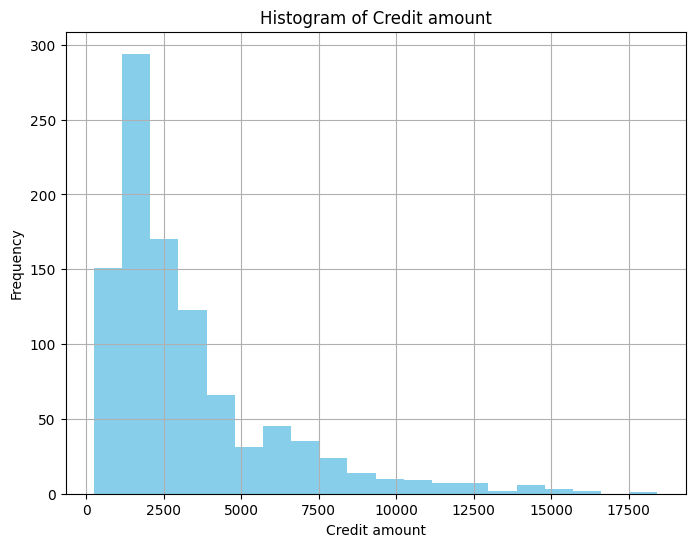

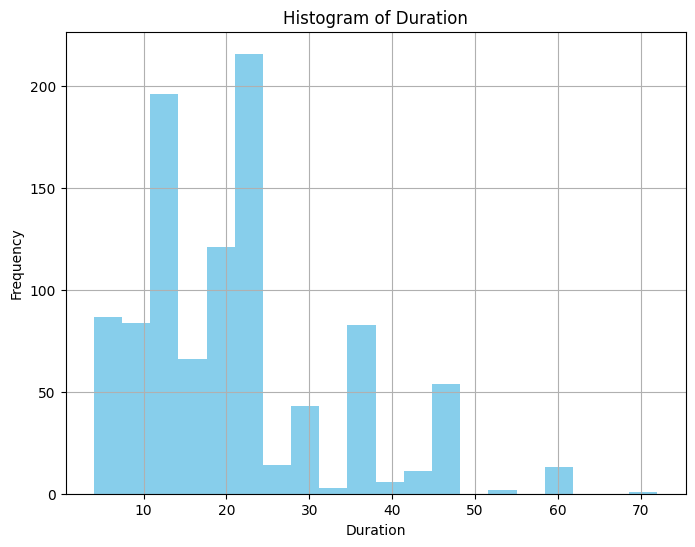

In [ ]:
numerical_features = ['Age', 'Credit amount', 'Duration']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(credit_coded[col], bins=20, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

According to the above visualizations of the numerical features, it is clear that the data is skewed to left side showing a positive skewness for all 3 features. So log transformation is applied to those 3 columns below.

In [ ]:
credit_coded['Log_Age'] = np.log1p(credit_coded['Age'])
credit_coded['Log_Credit'] = np.log1p(credit_coded['Credit amount'])
credit_coded['Log_Duration'] = np.log1p(credit_coded['Duration'])

Then the data is visualized again to see the result.

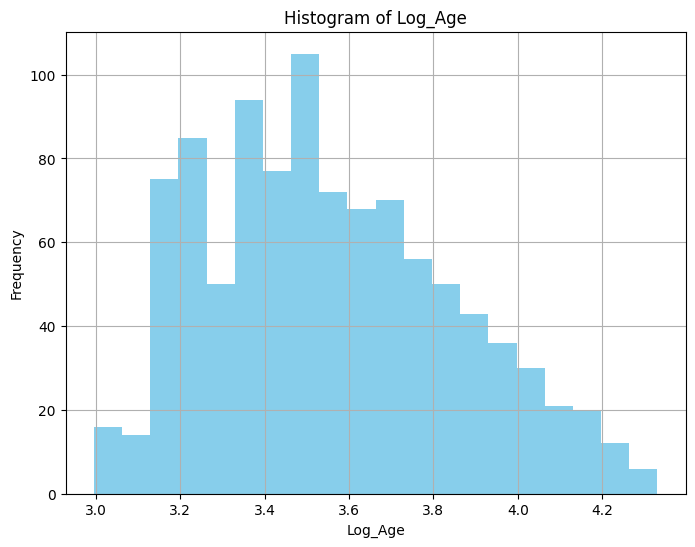

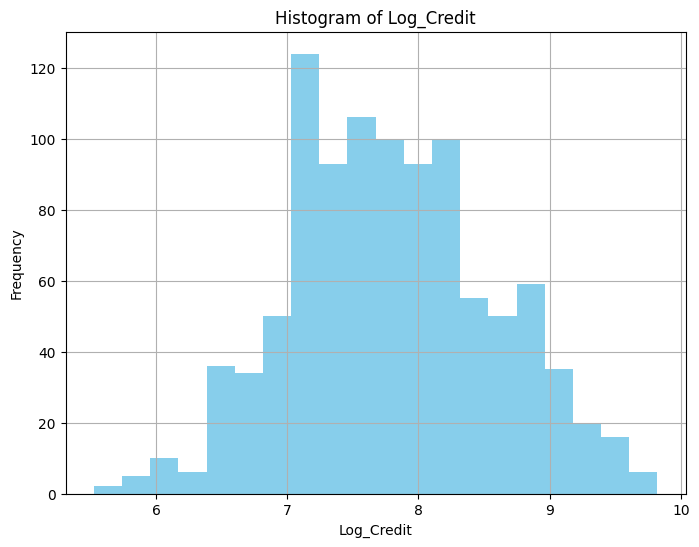

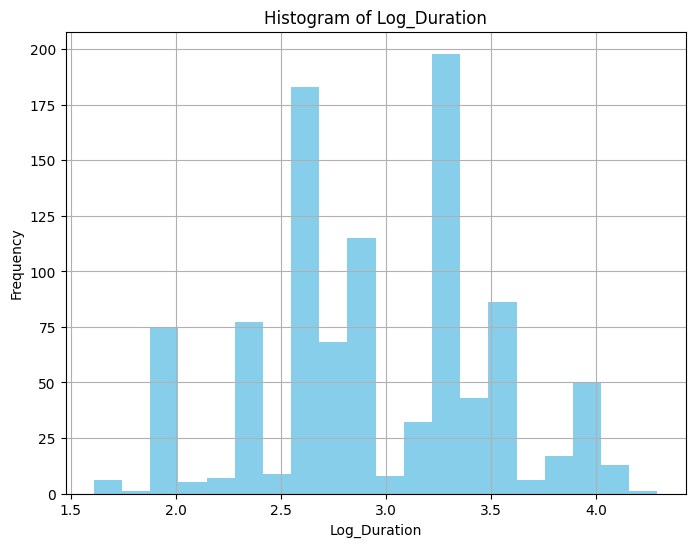

In [ ]:
numerical_features = ['Log_Age', 'Log_Credit', 'Log_Duration']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(credit_coded[col], bins=20, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

According to the visualizations, it can be seen that the data has been normalized. Somehow the age is little bit skewed still even after log transformation. Other 2 columns are normalized really well.

Now feature scaling is applied to the numerical features of the dataset using the StandardScaler package. Since the log transformed features represent all the numerical features in the dataset, a new dataframe is created using the same features and used for future steps as well.

In [ ]:
credit_df = credit_coded.loc[:, ['Log_Age', 'Log_Credit', 'Log_Duration']]
credit_df.head()

,Log_Age,Log_Credit,Log_Duration
0,4.219508,7.064759,1.945910
1,3.135494,8.691483,3.891820
2,3.912023,7.648263,2.564949
3,3.828641,8.972464,3.761200
4,3.988984,8.491055,3.218876


Feature scaling is applied to the new dataframe and then analyzed further.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

credit_cluster = scaler.fit_transform(credit_df)
credit_cluster_df = pd.DataFrame(credit_cluster, columns=credit_df.columns)
credit_cluster_df.head()

,Log_Age,Log_Credit,Log_Duration
0,2.282879,-0.933992,-1.822056
1,-1.438777,1.163149,1.741206
2,1.227217,-0.181750,-0.688500
3,0.940950,1.525385,1.502020
4,1.491441,0.904761,0.508940


In [ ]:
credit_cluster_df.describe()

,Log_Age,Log_Credit,Log_Duration
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.634248e-16,4.156675e-16,3.588241e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.918610e+00,-2.918436e+00,-2.438189e+00
25%,-7.634271e-01,-7.338481e-01,-6.884997e-01
50%,-9.684687e-02,-5.118791e-02,6.404293e-03
75%,7.094090e-01,6.421359e-01,5.089405e-01
max,2.664741e+00,2.619900e+00,2.471175e+00


Since the new dataframe created above includes all and only the numerical features from the dataset the same is used for the clustering step. The kmeans clustering is used for clustering and elbow method is applied to find the optimal number of clusters. The graph is plotted below to visualize the elbow.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

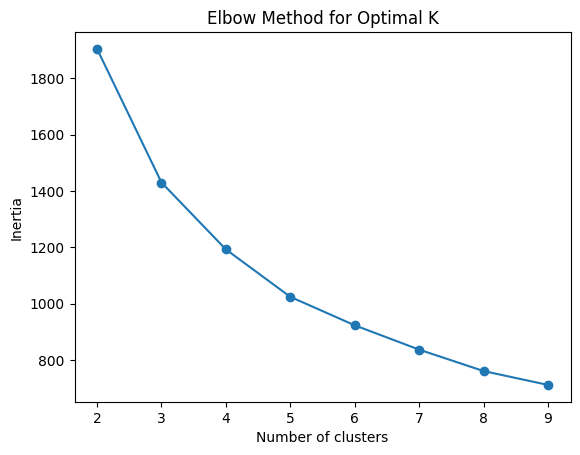

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(credit_cluster_df)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

According to the graph it can be decided that the optimal number of clusters is 3.

In [ ]:
km = KMeans(n_clusters=3, init='k-means++', random_state=42)
credit_fit = km.fit_predict(credit_cluster_df)

credit_cluster_df['Clusters'] = credit_fit
credit_cluster_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Log_Age,Log_Credit,Log_Duration,Clusters
0,2.282879,-0.933992,-1.822056,2
1,-1.438777,1.163149,1.741206,1
2,1.227217,-0.181750,-0.688500,2
3,0.940950,1.525385,1.502020,1
4,1.491441,0.904761,0.508940,1


The clustering is added to a new column called "Cluster" in the same dataframe. Then the clustering is analyzed further.

In [ ]:
credit_cluster_df.Clusters.unique()

array([2, 1, 0], dtype=int32)

In [ ]:
print(credit_cluster_df.Clusters.value_counts())

1    374
0    366
2    260
Name: Clusters, dtype: int64


Now PCA for 2 components will be applied to visualize the 3 clusters.

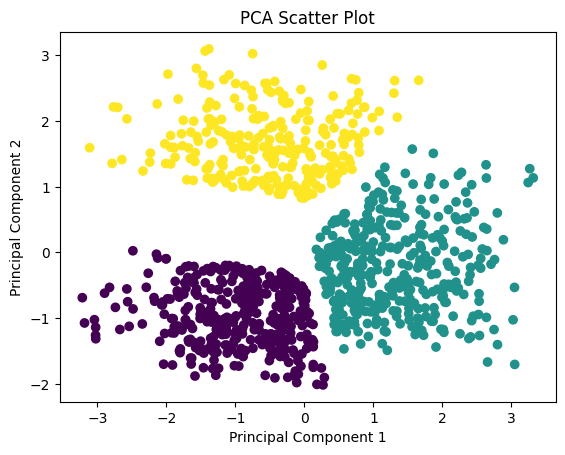

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
credit_pca = pca.fit_transform(credit_cluster_df)

plt.scatter(credit_pca[:, 0], credit_pca[:, 1], c=credit_cluster_df['Clusters'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

The PCA visualization displays the clustering clearly. The 3 clusters are separated clearly.

Now all the required features are combined into a new dataframe to implement KFold CV. The selected classifier is Random Forest Classifier because from the previous experience, it worked really well in such datasets.

In [ ]:
credit_cluster_df = credit_cluster_df.drop('Log_Age', axis=1)
credit_cluster_df = credit_cluster_df.drop('Log_Credit', axis=1)
credit_cluster_df = credit_cluster_df.drop('Log_Duration', axis=1)

credit_cluster_df = pd.concat([credit_cluster_df, credit_coded], axis=1)

credit_cluster_df = credit_cluster_df.drop('Age', axis=1)
credit_cluster_df = credit_cluster_df.drop('Credit amount', axis=1)
credit_cluster_df = credit_cluster_df.drop('Duration', axis=1)

credit_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clusters                     1000 non-null   int32  
 1   Job                          1000 non-null   int64  
 2   Sex_female                   1000 non-null   uint8  
 3   Sex_male                     1000 non-null   uint8  
 4   Housing_free                 1000 non-null   uint8  
 5   Housing_own                  1000 non-null   uint8  
 6   Housing_rent                 1000 non-null   uint8  
 7   Saving accounts_little       1000 non-null   uint8  
 8   Saving accounts_moderate     1000 non-null   uint8  
 9   Saving accounts_quite rich   1000 non-null   uint8  
 10  Saving accounts_rich         1000 non-null   uint8  
 11  Checking account_little      1000 non-null   uint8  
 12  Checking account_moderate    1000 non-null   uint8  
 13  Checking account_ri

Above table displays all the features used to build the model and it is clear that no any column has null values.

The KFold package is imported from Sklearn - model selection library to implement cross validation. The Random Forest Classifier package is imported from the Sklearn - ensemble library to classify the data. Then accuracy score, precision score, recall score, and f1 score packages are imported from Sklearn - metrics library to evaluate the model performance.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Then the features and labels are seperated as below.

In [ ]:
X = credit_cluster_df.drop('Clusters', axis=1)
y = credit_cluster_df['Clusters']

The KFold cross validation is used where as k = 5 in which the dataset is divided into 5 folds to perform cross validation. The data will be shuffled as well.

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

The dataset is splitted into 5 folds using kfold cross validation and then trained and tested using Random Forest Classifier. The results will be printed at the end.

In [ ]:
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    rfc.fit(X_train, y_train)

    # Predict on the test fold
    y_pred = rfc.predict(X_test)

    # Calculate evaluation metrices for the folds
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Calculate mean accuracy across all folds
mean_accuracy = round(np.mean(accuracy_scores), 5)
mean_precision = round(np.mean(precision_scores), 5)
mean_recall = round(np.mean(recall_scores), 5)
mean_f1 = round(np.mean(f1_scores), 5)

# Display mean evaluation metric scores
print(f'Mean Accuracy across {5} folds:', mean_accuracy)
print(f'Mean Precision across {5} folds:', mean_precision)
print(f'Mean Recall across {5} folds:', mean_recall)
print(f'Mean F1-score across {5} folds:', mean_f1)

Mean Accuracy across 5 folds: 0.953
Mean Precision across 5 folds: 0.95471
Mean Recall across 5 folds: 0.95208
Mean F1-score across 5 folds: 0.95295


All the evaluation metrics has given more than 95% mean result for the 5 folds. Hence it can be concluded that the given model can be used to give a 95.3% accuracy. 95.5% precision, and 95.2% recall in predicting/classifying a credit card user.